In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_1samp, ttest_ind, f_oneway, chi2_contingency, norm, binom, shapiro, levene
import statsmodels.api as sm
# importing libraries

In [2]:
df=pd.read_csv('C:/Users/AVITA/Downloads/d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_428_original_bike_sharing.csv_1642089089.txt')

In [3]:
df.head() #first 5 rows of the dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()# There are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


<Axes: xlabel='holiday', ylabel='count'>

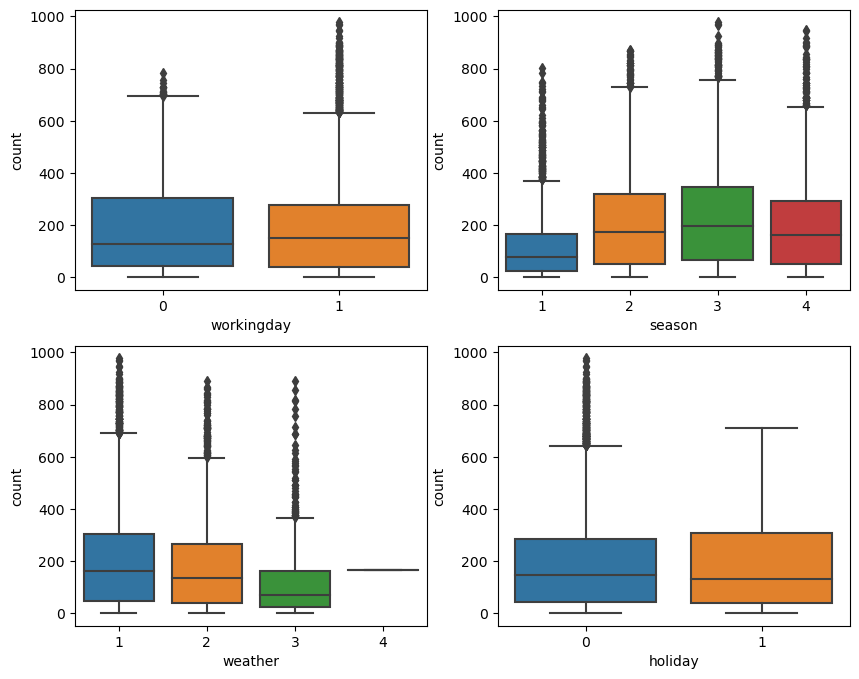

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x=df['workingday'],y=df['count'])
plt.subplot(2,2,2)
sns.boxplot(x=df['season'],y=df['count'])
plt.subplot(2,2,3)
sns.boxplot(x=df['weather'],y=df['count'])
plt.subplot(2,2,4)
sns.boxplot(x=df['holiday'],y=df['count'])
# Boxplot created between categorical columns ['workingday','season,'weather','holiday'] and count, to check for outliers.
# plot 1 shows there are more outliers on working day.
# plot 2 shows season 1 has most outliers
# plot 3 shows weather 4 has only few datapoints.
# plot 4 shows on non holiday day there are more outliers.

<Axes: xlabel='holiday', ylabel='count'>

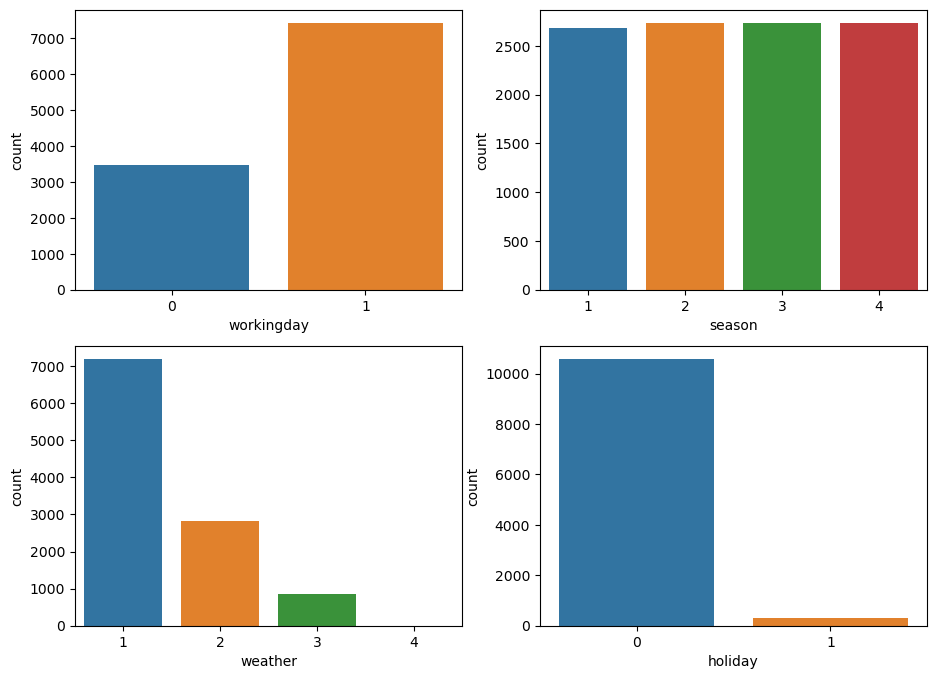

In [7]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.countplot(x=df['workingday'])
plt.subplot(2,2,2)
sns.countplot(x=df['season'])
plt.subplot(2,2,3)
sns.countplot(x=df['weather'])
plt.subplot(2,2,4)
sns.countplot(x=df['holiday'])
# countplots created betweeen categorical columns and there counts.
# plot 1 shows working days are 7412 and non workingdays are 3474.
# plot 2 shows in data season 4 count is 2734, season 2 count is 2733, season 3 count 2733 and season 1 count is 2686.
# plot 3 shows in data weather type 1 count is 7192, weather type 2 count is 2834, weather type 3 count is 859, weather type 4 
# count is 1.
# plot 4 shows non holiday days are more as compared holiday days.

In [8]:
cate=['workingday','season','weather','holiday']
for i in cate:
    print(i)
    print(df[i].value_counts())

workingday
1    7412
0    3474
Name: workingday, dtype: int64
season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
holiday
0    10575
1      311
Name: holiday, dtype: int64


<Axes: xlabel='windspeed', ylabel='count'>

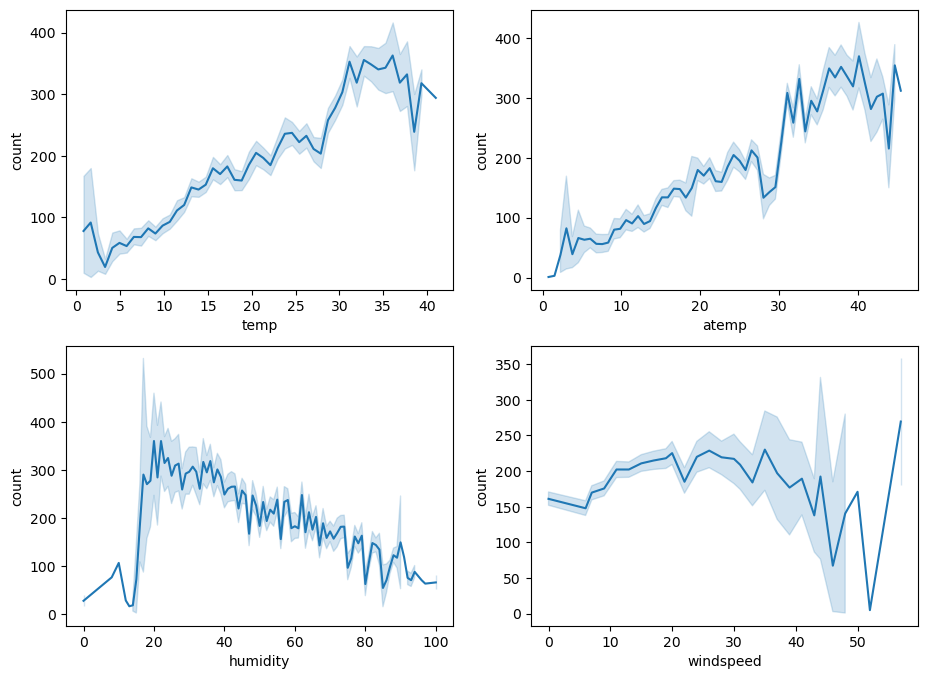

In [9]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.lineplot(x=df['temp'],y=df['count'])
plt.subplot(2,2,2)
sns.lineplot(x=df['atemp'],y=df['count'])
plt.subplot(2,2,3)
sns.lineplot(x=df['humidity'],y=df['count'])
plt.subplot(2,2,4)
sns.lineplot(x=df['windspeed'],y=df['count'])
# lineplots created to show relation between numerical and numerical columns, lets describe the correlation below using heatmap.

<Axes: >

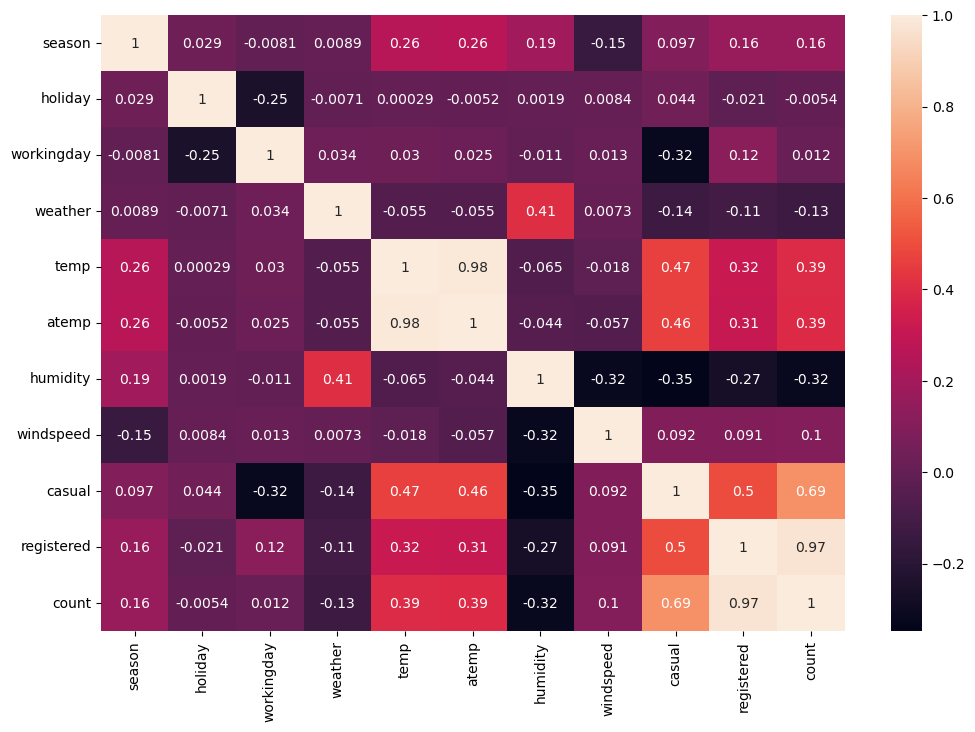

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
# heatmap created.
# from heatmap we see temp and atemp has positive coorelation with count.
# humidity and count has negative coorelation.
# windspead and count has very less coorelation.

<Axes: xlabel='holiday', ylabel='count'>

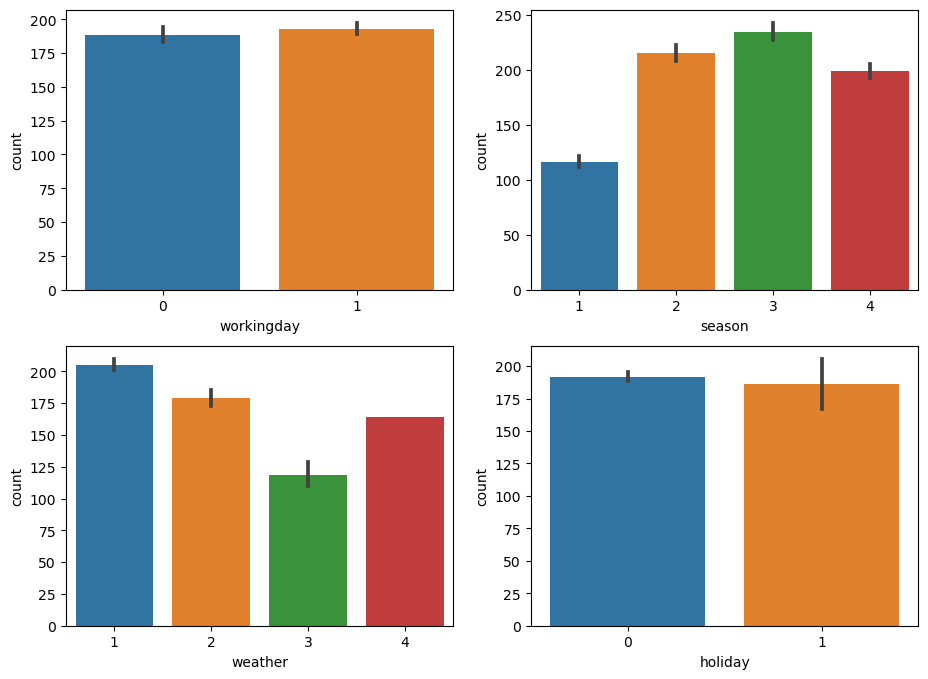

In [11]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x=df['workingday'],y=df['count'])
plt.subplot(2,2,2)
sns.barplot(x=df['season'],y=df['count'])
plt.subplot(2,2,3)
sns.barplot(x=df['weather'],y=df['count'])
plt.subplot(2,2,4)
sns.barplot(x=df['holiday'],y=df['count'])
# plot 1 shows avg count of yulu bikes are somewhat similar on working and nonworking day.
# plot 2 shows season 3 has most number of avg count of yulu bikes and least are in season 1.
# plot 3 shows most avg bikes are rented in weather 1.

In [12]:
cate=['workingday','season','weather','holiday']
for i in cate:
    print(df.groupby(i)['count'].mean())

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
holiday
0    191.741655
1    185.877814
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Count'>

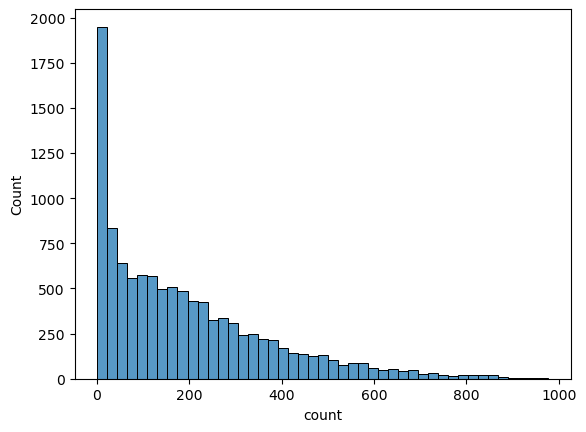

In [13]:
sns.histplot(df['count']) # we se count data is not normally distributed.

In [14]:
#PERFORMING 2 SAMPLE Ttest TO CHECK IF WORKING OR NON WORKING DAY HAS ANY SIGNIFICANCE ON COUNT OF CYCLE RENTED.
# Ho-> there is no significance difference of number of cycles rented on non working and working days.
working_day=df.query('workingday==1')
working_day=working_day['count']
working_day

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [15]:
non_working_day=df.query('workingday==0')
non_working_day=non_working_day['count']
non_working_day

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [16]:
# shapiro test to check the normailty
#ho-> data of both groups is normally distributed.
# we are taking alpha as 0.5.
print(shapiro(working_day))
print(80*"*")
print(shapiro(non_working_day))
# shapiro test shows that data of 2 groups is not normally distributed, so we reject null hypothesis.

ShapiroResult(statistic=0.8702582120895386, pvalue=0.0)
********************************************************************************
ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)


In [17]:
# levene's test to check equl variance
# Ho-> both groups have equal variance.
# we are taking alpha as 0.5.
levene(working_day,non_working_day)
# this shows both groups have equal variance so w accept null hypothesis.

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

In [18]:
'''so lets say critical value to be alpha 0.05 and after performing 2 sample ttest we got pvalue to be 0.22, in this case we 
can say that there is no difference in count of cycles rented on working and non working day so we can not reject our null
hypothesis'''
ttest_ind(working_day,non_working_day)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

In [19]:
#ANOVA TEST
# ANNOVA to check if No. of cycles rented is similar or different in different weather?
# ho-> number of cycles rented in different weathers are same.

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [22]:
Clear=df.query('weather==1')
Clear=Clear['count']
Clear

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7192, dtype: int64

In [23]:
Mist=df.query('weather==2')
Mist=Mist['count']
Mist

5          1
13        94
14       106
15       110
16        93
        ... 
10835    120
10836     54
10838     18
10839     15
10840      7
Name: count, Length: 2834, dtype: int64

In [24]:
Light_rain=df.query('weather==3')
Light_rain=Light_rain['count']
Light_rain

18        35
19        37
29         2
31         8
37        59
        ... 
10808    107
10818      5
10830    302
10837     47
10850    313
Name: count, Length: 859, dtype: int64

In [25]:
Heavy_rain=df.query('weather==4')
Heavy_rain=Heavy_rain['count']
Heavy_rain

5631    164
Name: count, dtype: int64

In [26]:
# shapiro test to check the normailty
# h0-> data for all these groups is normally distributed.
# we are not considering the weather type 4 as there are very few datapoints.
print(shapiro(Clear))
print(80*"*")
print(shapiro(Mist))
print(80*"*")
print(shapiro(Light_rain))
# shapiro test shows data is not normally distributed, so we reject our null hypthesis.

ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)
********************************************************************************
ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)
********************************************************************************
ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)


In [27]:
# levene's test to check equl variance
# h0-> these groups has equal variance.
levene(Clear,Mist,Light_rain)
# we reject our null hypothesis as we see p values i less than alpha that is 0.5.

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

In [28]:
# ho-> there is no significance difference between bikes rented in different weathers.
f_oneway(Clear,Mist,Light_rain,Heavy_rain)
# as the p value is very low so we reject our null hypothesis,and conculde that there is significance difference.

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [29]:
#ANOVA TEST
# ANNOVA to check if No. of cycles rented is similar or different in different season?
# season: season (1: spring, 2: summer, 3: fall, 4: winter)
#ho-> cycles rented in different seasons has no significance difference.

In [30]:
spring=df.query('season==1')
spring=spring['count']
spring

0        16
1        40
2        32
3        13
4         1
       ... 
6780    549
6781    330
6782    223
6783    148
6784     54
Name: count, Length: 2686, dtype: int64

In [31]:
summer=df.query('season==2')
summer=summer['count']
summer

1323      6
1324      4
1325      7
1326      4
1327      3
       ... 
8146    514
8147    458
8148    276
8149    291
8150    125
Name: count, Length: 2733, dtype: int64

In [32]:
fall=df.query('season==3')
fall=fall['count']
fall

2690     68
2691     31
2692     13
2693     11
2694      6
       ... 
9514    611
9515    409
9516    349
9517    229
9518    123
Name: count, Length: 2733, dtype: int64

In [33]:
winter=df.query('season==4')
winter=winter['count']
winter

4055     130
4056      58
4057      67
4058      25
4059       8
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 2734, dtype: int64

In [34]:
# shapiro test to check the normailty
# ho-> data in these groups is normally distributed.
print(shapiro(spring))
print(80*"*")
print(shapiro(summer))
print(80*"*")
print(shapiro(fall))
print(80*"*")
print(shapiro(winter))
# as p values is very less, so we reject our null hypothesis.

ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)
********************************************************************************
ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)
********************************************************************************
ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)
********************************************************************************
ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)


In [35]:
# levene's test to check equl variance
#ho-> all these groups have equal variance.
levene(spring,summer,fall, winter)
# as p values is very less so we reject our null hypothesis.

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [36]:
f_oneway(spring,summer,fall,winter)
# as p value is very low we reject our null hypothesis and can conclude that season has impact on cycles rented.

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [37]:
# performing chi2_contingency test between weather and season column

In [38]:
observed=pd.crosstab(df['weather'],df['season'])
# ho-> weather and season are independent to each other.
# ha-> weather and season are dependent to each other

In [39]:
chi2_contingency(observed)
# we reject our null hyptothesis and can conculde that weather and season our dependent.

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Insights

In [40]:
# weather and season our dependent to each other.
# season has impact on cycles rented.
# weather has impact on cycles rented.
# working and non working day has no impact on cycle rented.
# when weather (LightSnow,Light Rain+Thunderstorm +Scattered clouds,Light Rain+Scattered clouds) cycles rented are very less.
# Most cycles are rented in weather type 1 i.e(Clear, Few clouds, partly cloudy, partly cloudy).
# Least Cycles rented in season type 1 i.e(spring) and most in season type 3 i.e(fall).
# we see temp and atemp has positive coorelation with count.
# humidity and count has negative coorelation.
# windspead and count has very less coorelation.
# so we see weather and season are the variables which affects the demand of bikes rented.

Recommendations

In [41]:
# So as we see least bikes are rented when there is rain, so yulu should think of providing some shield feature in there cycle to
# protect customers from rain.

# Yulu should start doing some events on days when there are less cycles rented to increase count.

# In waether 1 and weather 2 bikes rented are more, so yulu should keep an eye on stock of bikes in these days.may be they can
#increase the number of bikes these days.